In [1]:
import numpy as np, pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'archive.zip',
 'Dataset Link.pdf',
 'Employee Future Prediction.pdf',
 'Employee.csv',
 'employee_prediction.ipynb',
 'practice.ipynb']

In [4]:
import shutil

In [5]:
csv_file = shutil.unpack_archive('archive.zip',format='zip')

In [6]:
df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [8]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


<AxesSubplot:>

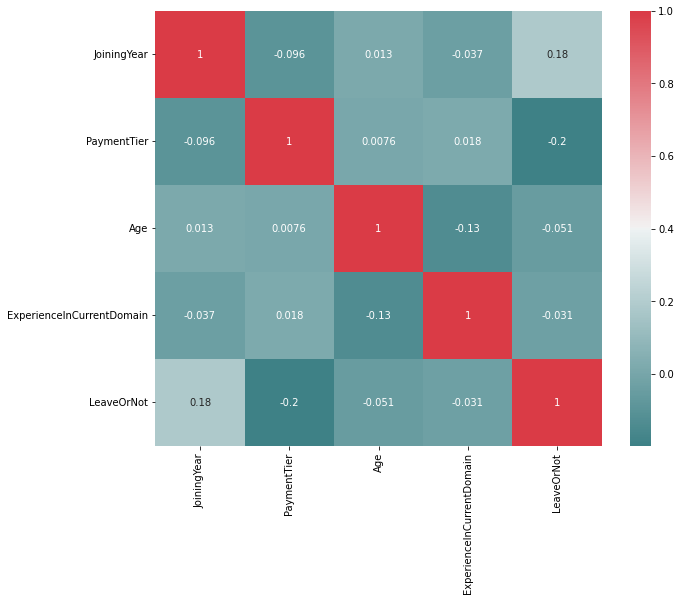

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True, cmap = sns.diverging_palette(200,10,as_cmap = True ))

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

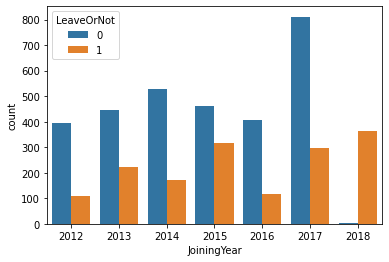

In [10]:
df['JoiningYear'] = df['JoiningYear'].astype('object')
sns.countplot(data = df, x = 'JoiningYear', hue = 'LeaveOrNot')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   object
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 327.3+ KB


In [12]:
def display_countplot(Data,X, Hue):
    print(sns.countplot(data = Data, x = X, hue = Hue))

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

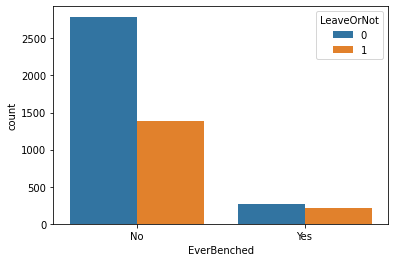

In [13]:
sns.countplot(data = df , x = 'EverBenched' , hue = 'LeaveOrNot')

# or

#display_countplot(df,'EverBenched','LeaveOrNot' )

AxesSubplot(0.125,0.125;0.775x0.755)


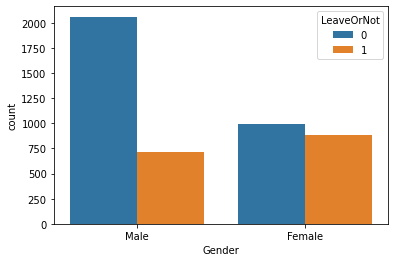

In [14]:
display_countplot(df,'Gender','LeaveOrNot')

AxesSubplot(0.125,0.125;0.775x0.755)


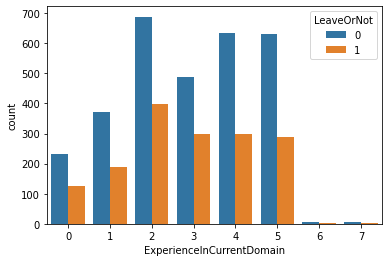

In [15]:
display_countplot(df, 'ExperienceInCurrentDomain','LeaveOrNot')

AxesSubplot(0.125,0.125;0.775x0.755)


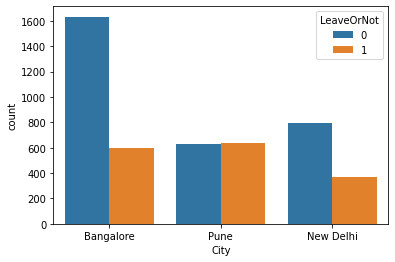

In [16]:
display_countplot(df,'City','LeaveOrNot')

AxesSubplot(0.125,0.125;0.775x0.755)


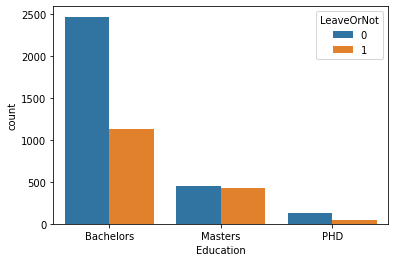

In [17]:
display_countplot(df,'Education','LeaveOrNot')

AxesSubplot(0.125,0.125;0.775x0.755)


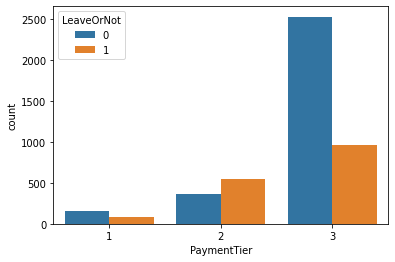

In [18]:
df['PaymentTier'] = df['PaymentTier'].astype('category')
display_countplot(df,'PaymentTier','LeaveOrNot')

AxesSubplot(0.125,0.125;0.775x0.755)


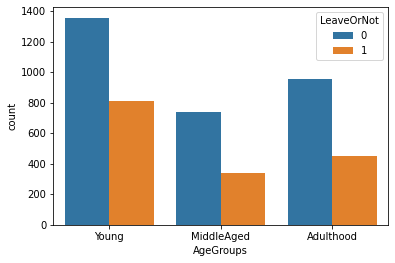

In [19]:
groups = ['Young', 'MiddleAged', 'Adulthood']
df['AgeGroups'] = pd.qcut(df['Age'],q = 3 , labels=groups)
display_countplot(df, 'AgeGroups','LeaveOrNot')

# feature engineering

In [25]:
x = df.drop('LeaveOrNot', axis = 1)
y = df.LeaveOrNot.values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=24)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  4653 non-null   object  
 1   JoiningYear                4653 non-null   object  
 2   City                       4653 non-null   object  
 3   PaymentTier                4653 non-null   category
 4   Age                        4653 non-null   int64   
 5   Gender                     4653 non-null   object  
 6   EverBenched                4653 non-null   object  
 7   ExperienceInCurrentDomain  4653 non-null   int64   
 8   LeaveOrNot                 4653 non-null   int64   
 9   AgeGroups                  4653 non-null   category
dtypes: category(2), int64(3), object(5)
memory usage: 300.3+ KB


In [35]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeGroups
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,Adulthood
1,Bachelors,2013,Pune,1,28,Female,No,3,1,MiddleAged
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,Adulthood
3,Masters,2016,Bangalore,3,27,Male,No,5,1,Young
4,Masters,2017,Pune,3,24,Male,Yes,2,1,Young


In [36]:
df.JoiningYear.value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

In [37]:
df.Education.value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [43]:
multi_categories = ['AgeGroups','City','JoiningYear']
ordinal_cat = [['PHD','Masters','Bachelors'],[1,2,3]]
binary_categories = ['Gender','EverBenched']
transformer = ColumnTransformer(transformers=[('ohe1',OneHotEncoder(sparse=False),multi_categories),
                                            ('oe',OrdinalEncoder(categories=ordinal_cat),['Education','PaymentTier']),
                                            ('ohe2',OneHotEncoder(drop='first',sparse='False'),binary_categories)],
                                remainder= 'passthrough')


x_train= transformer.fit_transform(x_train)
x_train.shape
x_test = transformer.transform(x_test)

# model preparation and evaluation

In [21]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [45]:
clfs = {
    'KN' : KNeighborsClassifier(),
    'NB' : MultinomialNB(),
    'DT' : DecisionTreeClassifier(max_depth=7, random_state=12),
    'LR' : LogisticRegression(solver='liblinear',penalty = 'l1'),
    'RF' : RandomForestClassifier(n_estimators=17, random_state=2 , max_depth=5),
    'AB' : AdaBoostClassifier(n_estimators= 17 , random_state=2, learning_rate=0.2),
    'BC' : BaggingClassifier(n_estimators=17, random_state=2),
    'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GB' : GradientBoostingClassifier(n_estimators=18, random_state=2),
    'XGB': XGBClassifier(n_estimators= 17,random_state= 2, use_label_encoder=False, eval_metric = 'mlogloss'),
    'LGBM':LGBMClassifier(verbose = -1, learning_rate=0.1,max_depth=6,num_leaves=10, n_estimators=17, max_bin = 500,
                          random_state=2)
    
}

def train_classifier(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy_value = accuracy_score(y_test,y_pred)
    precision_value = precision_score(y_test,y_pred, zero_division=0)
    
    return accuracy_value, precision_value

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,x_train,x_test,y_train,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_df = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)
performance_df

C:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


,Algorithms,Accuracy,Precision
10,LGBM,0.851772,0.966507
5,AB,0.808808,0.942857
4,RF,0.830290,0.931034
8,GB,0.808808,0.928177
1,NB,0.770140,0.869565
9,XGB,0.860365,0.866426
3,LR,0.812030,0.855856
2,DT,0.853921,0.848057
7,ETC,0.832438,0.812721
6,BC,0.839957,0.804636
